In [1]:
import sys, os
os.path.dirname(sys.executable)

'/clusterfs/nilah/sergio/miniconda3/envs/ESM_cambrian/bin'

In [97]:
sys.path.append('/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/')
from ESMCBA.imports import *
from ESMCBA import graph_utils
from ESMCBA import other_utils
import importlib
importlib.reload(other_utils)

<module 'ESMCBA.other_utils' from '/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/ESMCBA/other_utils.py'>

In [22]:
evaluations_dt = other_utils.get_all_evaluations('/global/scratch/users/sergiomar10/losses/ESMCBA_21032025/*.csv')
# evaluations_dt = pd.read_csv('performances/models_performances_05032025.csv')

In [101]:
evaluations_dt = evaluations_dt.sort_values(by='spearman', ascending = False).reset_index(drop=True)

In [102]:
evaluations_dt_sorted = evaluations_dt.drop_duplicates('HLA')
evaluations_dt_sorted #.sort_values(by='mse', ascending = False, inplace = True)

,HLA,Losses,encoding,data_prop,trained_blocks,lr_transformer,lr_regression,n_evaluations,spearman,pearsonr,mse,mae,r2,rmse,time,path
0,HLAA1101,MSE,epitope,0.95,20,0.0001,1e-06,12,0.881119,0.352373,5.409533,2.296818,-3.512183,2.325840,2025-03-21 17:59:39,/global/scratch/users/sergiomar10/losses/ESMCB...
5,HLAA3001,MSE,HLA,0.95,20,0.0001,1e-06,414,0.803145,0.853561,1.322176,0.941483,0.621205,1.149859,2025-03-21 14:53:08,/global/scratch/users/sergiomar10/losses/ESMCB...
7,HLAA0203,MSE,epitope,0.5,20,0.0001,1e-05,2602,0.799350,0.857516,0.993388,0.791989,0.672105,0.996688,2025-03-21 16:04:49,/global/scratch/users/sergiomar10/losses/ESMCB...
29,HLAA0206,MSE,HLA,0.5,20,0.0001,1e-05,2174,0.771112,0.810994,1.392304,0.995960,0.541144,1.179959,2025-03-21 14:28:16,/global/scratch/users/sergiomar10/losses/ESMCB...
56,HLAA0202,MSE,epitope,0.5,20,0.0001,1e-06,1837,0.749167,0.795408,1.800753,1.167234,0.331912,1.341921,2025-03-21 18:52:29,/global/scratch/users/sergiomar10/losses/ESMCB...
77,HLAB3501,MSE,epitope,0.95,20,0.0001,1e-06,479,0.736911,0.800250,1.963302,1.233505,0.472839,1.401179,2025-03-21 15:59:48,/global/scratch/users/sergiomar10/losses/ESMCB...
95,HLAA6801,MSE,HLA,0.5,30,0.0001,1e-05,1522,0.720455,0.742493,1.184457,0.884825,0.489278,1.088328,2025-03-21 15:09:28,/global/scratch/users/sergiomar10/losses/ESMCB...
119,HLAA2301,MSE,HLA,0.5,30,0.0001,1e-06,987,0.696271,0.800633,1.002351,0.791526,0.569071,1.001175,2025-03-21 19:33:32,/global/scratch/users/sergiomar10/losses/ESMCB...
144,HLAB1517,MSE,epitope,0.95,20,0.001,1e-06,901,0.644127,0.748483,1.092369,0.812244,0.503265,1.045164,2025-03-21 18:33:14,/global/scratch/users/sergiomar10/losses/ESMCB...
145,HLAB3901,MSE,HLA,0.5,30,0.001,1e-05,13,0.642857,0.709495,2.445803,1.225220,-0.953775,1.563906,2025-03-21 14:50:53,/global/scratch/users/sergiomar10/losses/ESMCB...


In [98]:
other_utils.mhcflurry_predict(evaluations_dt_sorted)

Done.


In [75]:
merged_dfs_by_HLA = {}

# List to store combined metrics.
combined_metrics = []

for HLA, path in evaluations_dt_sorted[['HLA', 'path']].values:
    try:
        # Format HLA string.
        formatted_HLA = HLA.replace('HLA', 'HLA-')
        replicate_spearman = []
        replicate_pearson = []
        merged_replicates = []  # List to store merged df for each replicate.
        
        # Get all replicate CSV files using a glob pattern derived from 'path'
        file_paths = glob.glob(f'{path[:155]}*')
        print(f"{len(file_paths)} replicates for {formatted_HLA}")
        
        # Load the MHC Flurry predictions (assumed constant for each HLA)
        mhc_pred = pd.read_csv(f'/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/performances/benchmark/MHCFlurry{formatted_HLA}_mhc_flurry.csv')
        label = formatted_HLA
        
        # Loop over each replicate CSV file for the fine-tuned ESMC predictions
        for rep_path in file_paths:
            last_csv = pd.read_csv(rep_path)
            
            # Adjust the sequence if needed
            if len(last_csv['sequence'].iloc[0]) > 300:
                last_csv['sequence'] = last_csv['sequence'].apply(lambda x: x[365:])
                merged_df = pd.merge(last_csv, mhc_pred, left_on='sequence', right_on='peptide', how='left')
                # Fallback if the slicing didn't match any peptides.
                if merged_df['peptide'].notna().sum() == 0:
                    last_csv = pd.read_csv(rep_path)
                    last_csv['sequence'] = last_csv['sequence'].apply(lambda x: x[362:])
                    merged_df = pd.merge(last_csv, mhc_pred, left_on='sequence', right_on='peptide', how='left')
            else:
                merged_df = pd.merge(last_csv, mhc_pred, left_on='sequence', right_on='peptide', how='left')
            
            # Save the merged dataframe for this replicate.
            merged_replicates.append(merged_df.copy())
            
            # Compute log-transformed MHC affinity and filter out rows with missing values
            merged_df['mhc_log'] = merged_df['mhcflurry_affinity'].apply(np.log10)
            merged_df = merged_df[merged_df['mhc_log'].notna()]
            
            # Compute correlation metrics for this replicate
            sp, _ = spearmanr(merged_df['measured'], merged_df['prediction'])
            pr, _ = pearsonr(merged_df['measured'], merged_df['prediction'])
            replicate_spearman.append(sp)
            replicate_pearson.append(pr)
        
        # Store all merged dataframes in the dictionary under the current HLA.
        merged_dfs_by_HLA[formatted_HLA] = merged_df
        
        # Compute mean and standard deviation across replicates for fine-tuned ESMC
        esmc_sp_mean = np.mean(replicate_spearman) if replicate_spearman else np.nan
        esmc_sp_std = np.std(replicate_spearman) if replicate_spearman else np.nan
        esmc_pr_mean = np.mean(replicate_pearson) if replicate_pearson else np.nan
        esmc_pr_std = np.std(replicate_pearson) if replicate_pearson else np.nan
    
        # Append the fine-tuned ESMC metrics with error bars
        combined_metrics.append({
            'HLA': formatted_HLA,
            'model': 'Fine-tuned ESMC',
            'label': label,
            'spearman': esmc_sp_mean,
            'spearman_std': esmc_sp_std,
            'pearson': esmc_pr_mean,
            'pearson_std': esmc_pr_std
        })
          
        # Compute correlation metrics for MHC Flurry using the last replicate's merged predictions
        sp_mhc, _ = spearmanr(merged_df['measured'], merged_df['mhc_log'])
        pr_mhc, _ = pearsonr(merged_df['measured'], merged_df['mhc_log'])
        
        combined_metrics.append({
            'HLA': formatted_HLA,
            'model': 'MHC Flurry',
            'label': label,
            'spearman': sp_mhc,
            'spearman_std': 0,  # Single CSV file: no replicate standard deviation.
            'pearson': pr_mhc,
            'pearson_std': 0
        })
    except Exception as e:
        print(f"Error processing {HLA}: {e}")

# Create a dataframe with the combined metrics if needed.
combined_df = pd.DataFrame(combined_metrics)


2 replicates for HLA-A1101
1 replicates for HLA-A3001
Error processing HLAA3001: [Errno 2] No such file or directory: '/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/performances/benchmark/MHCFlurryHLA-A3001_mhc_flurry.csv'
2 replicates for HLA-A0203
1 replicates for HLA-A0206
Error processing HLAA0206: [Errno 2] No such file or directory: '/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/performances/benchmark/MHCFlurryHLA-A0206_mhc_flurry.csv'
2 replicates for HLA-A0202
2 replicates for HLA-B3501
1 replicates for HLA-A6801
Error processing HLAA6801: [Errno 2] No such file or directory: '/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/performances/benchmark/MHCFlurryHLA-A6801_mhc_flurry.csv'
1 replicates for HLA-A2301
Error processing HLAA2301: [Errno 2] No such file or directory: '/global/scratch/users/sergiomar10/ESMCBA/ESMCBA/performances/benchmark/MHCFlurryHLA-A2301_mhc_flurry.csv'
2 replicates for HLA-B1517
1 replicates for HLA-B3901
Error processing HLAB3901: [Errno 2] No such f

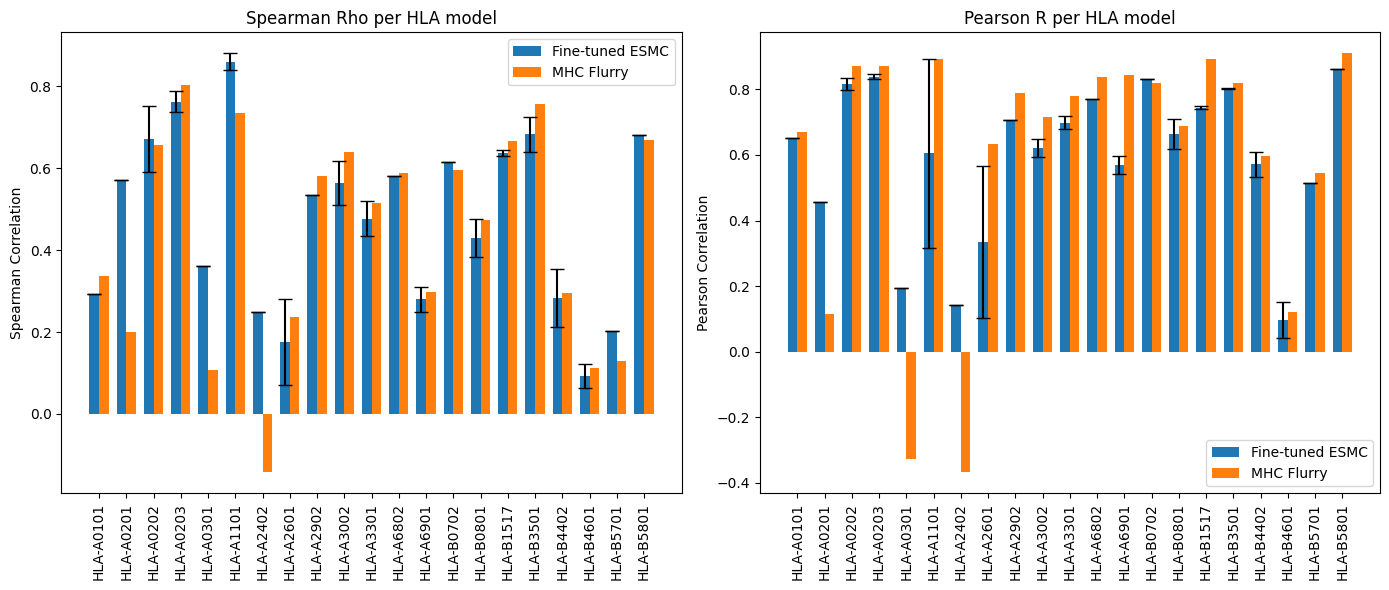

In [99]:
# Pivot the combined DataFrame to get values (and error bars) per HLA and model.
pivot_spearman     = combined_df.pivot(index='HLA', columns='model', values='spearman')
pivot_spearman_std = combined_df.pivot(index='HLA', columns='model', values='spearman_std')
pivot_pearson      = combined_df.pivot(index='HLA', columns='model', values='pearson')
pivot_pearson_std  = combined_df.pivot(index='HLA', columns='model', values='pearson_std')

# X-axis positions for each HLA.
x = np.arange(len(pivot_spearman.index))
width = 0.35  # width for each bar

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Spearman correlations:
# - Fine-tuned ESMC: with error bars from the aggregated data.
# - MHC Flurry: without error bars.
axes[0].bar(x - width/2, pivot_spearman['Fine-tuned ESMC'], width, 
            yerr=pivot_spearman_std['Fine-tuned ESMC'], capsize=5, label='Fine-tuned ESMC')
axes[0].bar(x + width/2, pivot_spearman['MHC Flurry'], width, label='MHC Flurry')
axes[0].set_xticks(x)
axes[0].set_xticklabels(pivot_spearman.index, rotation=90)
axes[0].set_ylabel('Spearman Correlation')
axes[0].set_title('Spearman Rho per HLA model')
axes[0].legend()

# Plot Pearson correlations:
# - Fine-tuned ESMC: with error bars from the aggregated data.
# - MHC Flurry: without error bars.
axes[1].bar(x - width/2, pivot_pearson['Fine-tuned ESMC'], width,
            yerr=pivot_pearson_std['Fine-tuned ESMC'], capsize=5, label='Fine-tuned ESMC')
axes[1].bar(x + width/2, pivot_pearson['MHC Flurry'], width, label='MHC Flurry')
axes[1].set_xticks(x)
axes[1].set_xticklabels(pivot_pearson.index, rotation=90)
axes[1].set_ylabel('Pearson Correlation')
axes[1].set_title('Pearson R per HLA model')
axes[1].legend()

plt.tight_layout()
plt.show()


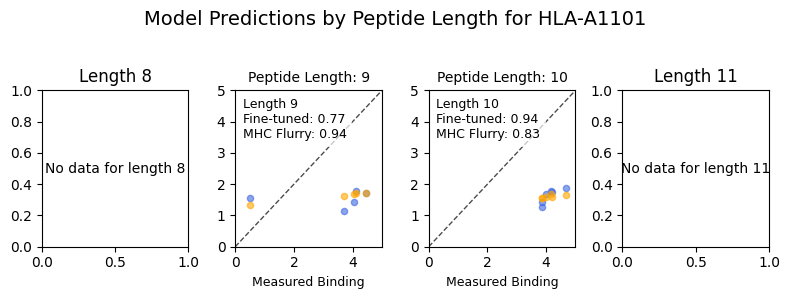

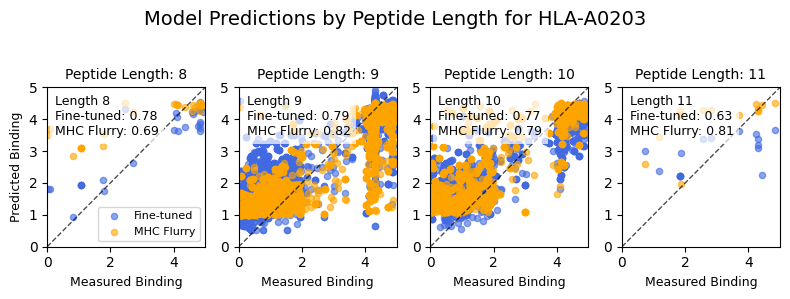

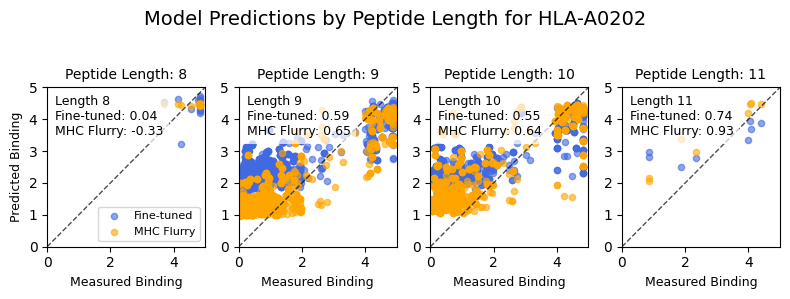

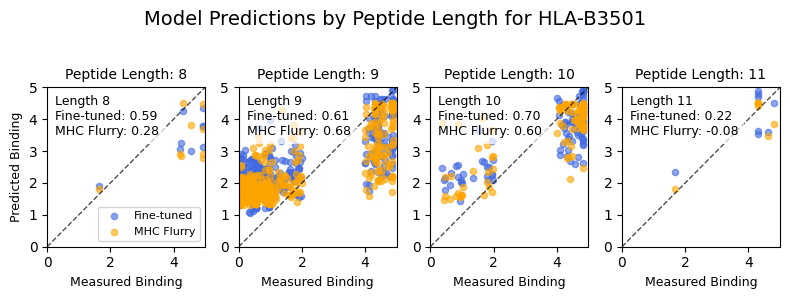

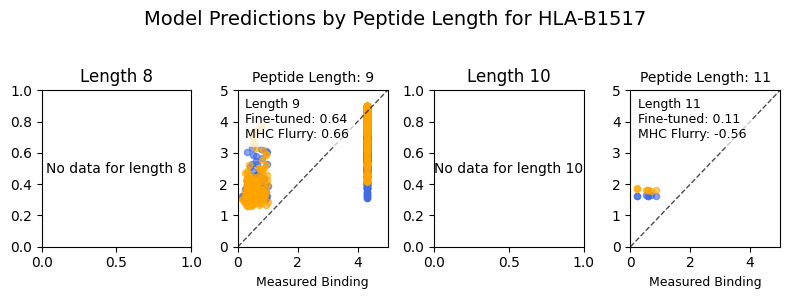

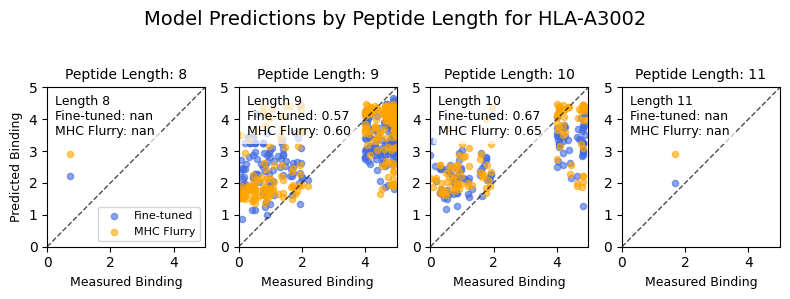

/tmp/ipykernel_1415938/3742307671.py:39: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  sp_finetuned, _ = spearmanr(preds_length['measured'], preds_length['prediction'])
/tmp/ipykernel_1415938/3742307671.py:40: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  sp_mhc, _       = spearmanr(preds_length['measured'], preds_length['mhc_log'])


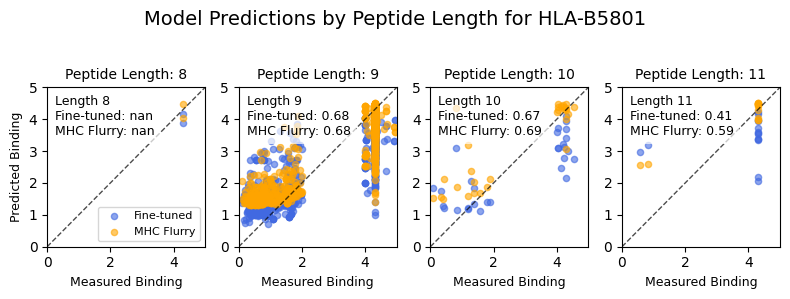

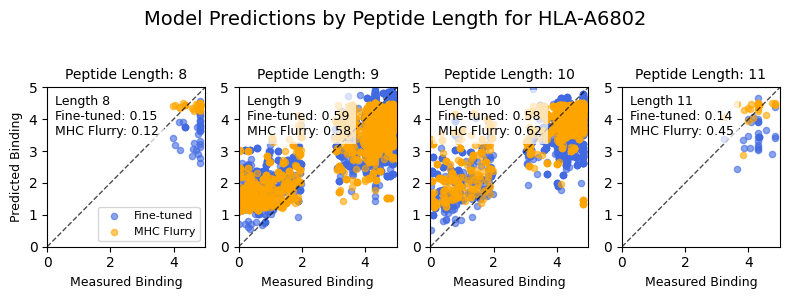

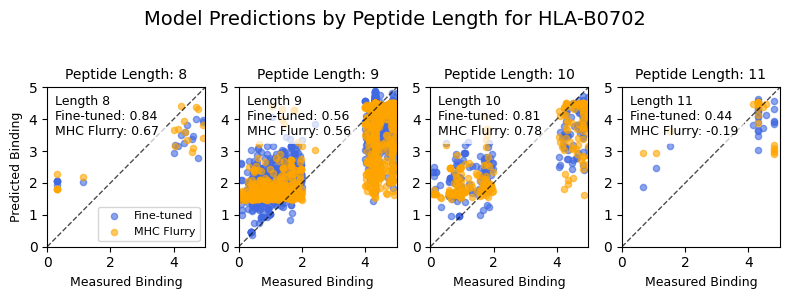

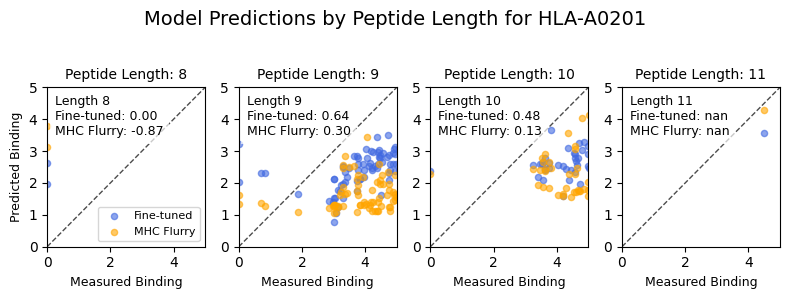

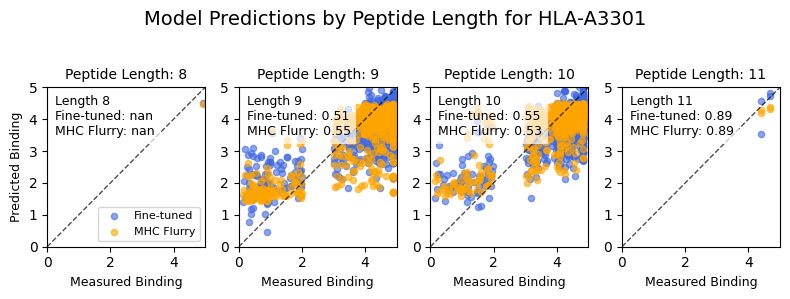

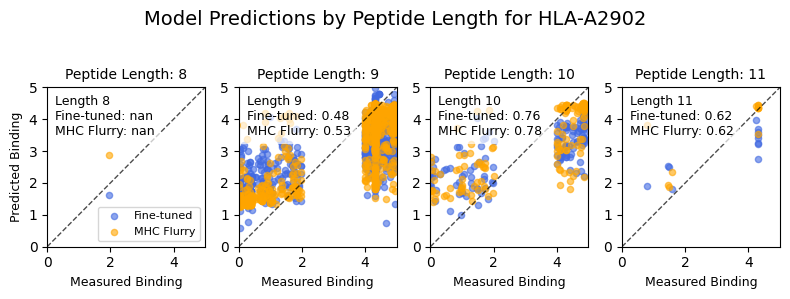

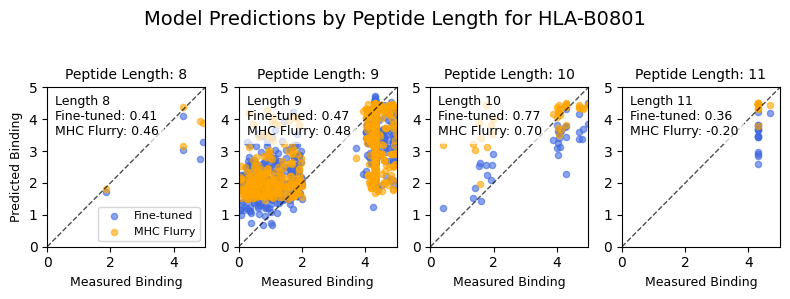

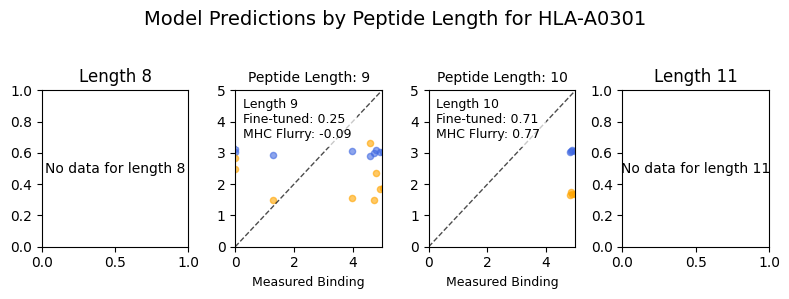

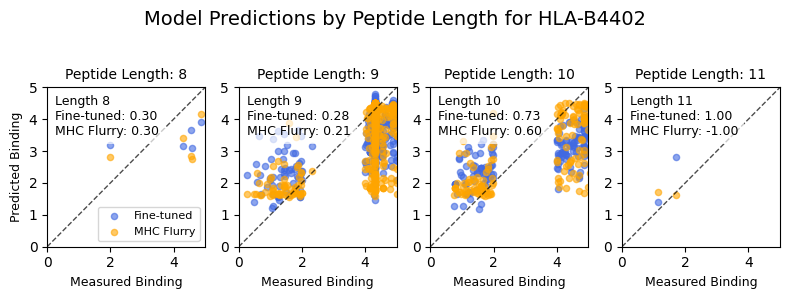

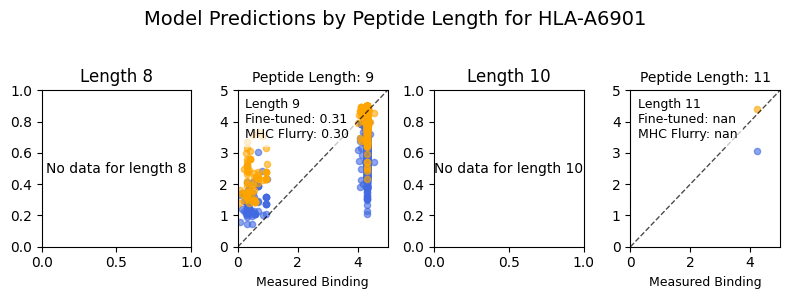

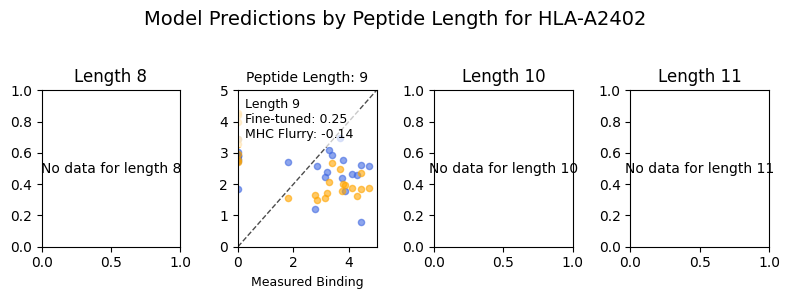

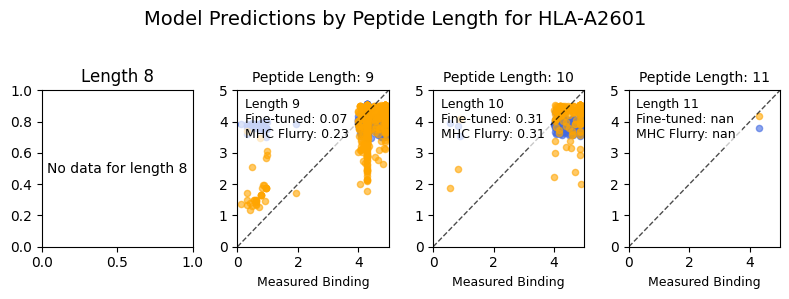

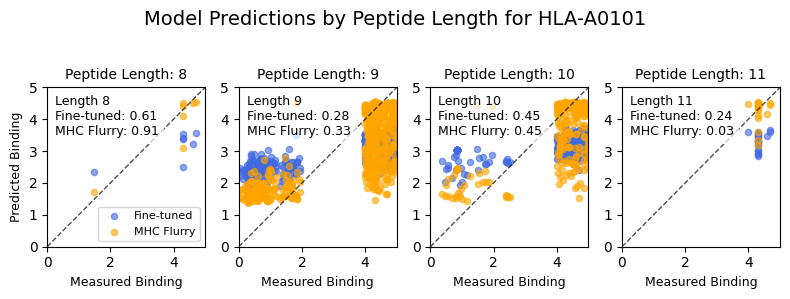

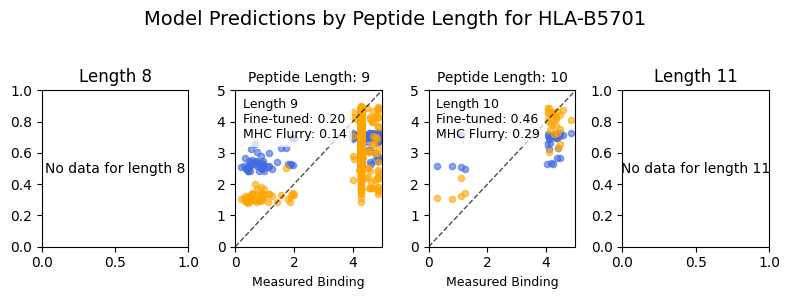

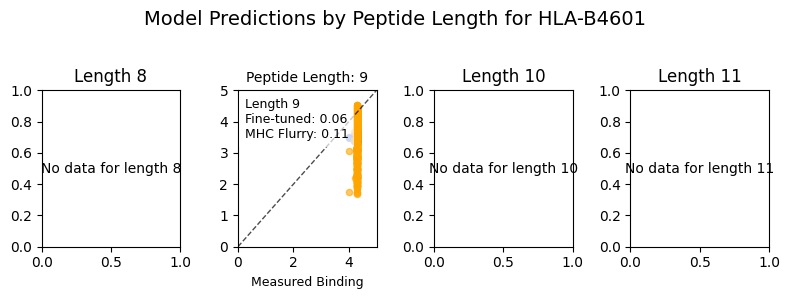

In [100]:
for HLA in merged_dfs_by_HLA.keys():

        predictions = merged_dfs_by_HLA[HLA]
        predictions['length'] = predictions['sequence'].str.len()
        
        fig, axes = plt.subplots(1, 4, figsize=(8, 3), sharex=False, sharey=False)
        
        # Loop over the four peptide lengths.
        for idx, L in enumerate([8, 9, 10, 11]):
            ax = axes[idx]
            preds_length = predictions[predictions['length'] == L]
            if preds_length.empty:
                ax.text(0.5, 0.5, f"No data for length {L}", ha='center', va='center')
                ax.set_title(f"Length {L}")
                continue
                
            # Scatter plots:
            # Fine-tuned predictions (assumed in column 'prediction')
            ax.scatter(preds_length['measured'], preds_length['prediction'], 
                       color='royalblue', alpha=0.6, s=20, label='Fine-tuned')
            # MHC Flurry predictions (log-transformed)
            ax.scatter(preds_length['measured'], preds_length['mhc_log'], 
                       color='orange', alpha=0.6, s=20, label='MHC Flurry')
            
            # Determine common limits for the x=y line.
            all_vals = np.concatenate([
                preds_length['measured'].values, 
                preds_length['prediction'].values,
                preds_length['mhc_log'].values
            ])
            min_val, max_val = np.min(all_vals), np.max(all_vals)
            pad = (max_val - min_val) * 0.05
            lims = [min_val - pad, max_val + pad]
            ax.plot([0,5], [0,5], 'k--', alpha=0.7, lw=1)
            ax.set_xlim([0,5])
            ax.set_ylim([0,5])
            
            # Compute Spearman correlations for each model.
            sp_finetuned, _ = spearmanr(preds_length['measured'], preds_length['prediction'])
            sp_mhc, _       = spearmanr(preds_length['measured'], preds_length['mhc_log'])
            
            # Annotate the panel with Spearman correlation values.
            annotation = (f"Length {L}\n"
                          f"Fine-tuned: {sp_finetuned:.2f}\n"
                          f"MHC Flurry: {sp_mhc:.2f}")
            ax.text(0.05, 0.95, annotation, transform=ax.transAxes,
                    verticalalignment='top', fontsize=9,
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
            
            ax.set_title(f"Peptide Length: {L}", fontsize=10)
            if idx == 0:
                ax.set_ylabel("Predicted Binding", fontsize=9)
            ax.set_xlabel("Measured Binding", fontsize=9)
            if idx == 0:
                ax.legend(fontsize=8)
        
        fig.suptitle(f"Model Predictions by Peptide Length for {HLA}", fontsize=14)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        
        # Save the figure with the HLA name in the specified folder.
        save_path = f'/global/scratch/users/sergiomar10/data/figures_presentation/{HLA}.png'
        # plt.savefig(save_path, dpi=300)
        # plt.close(fig)
        plt.show()
        